# Mandatory Assignment 2


## Integration af Flygtninge på Arbejdsmarkedet 
Af: Mathias Nikolaisen(dnt357), Oliver Mattthews(jvc975) & Clara Maj Folkmann(djz279)

### Problem 1: Descriptive analysis


In [3]:
import pandas as pd

df = pd.read_stata('Integration.dta')
df['const'] = 1
print(df.shape)
print(df.columns)
vars=['taxrev', 'taxrate', 'pop']
df.describe()



df_dummies = pd.get_dummies(df, columns=['ankomstaar'], prefix='dummy_ankomstaar')
# Separate data by gender (mand) and year (aar), and calculate mean for 'aarslon', 'alder', and dummies for the year of arrival
summary_table = df_dummies.groupby(['mand', 'aar']).agg(
    mean_aarslon=('aarslon', 'mean'),
    mean_alder=('alder', 'mean'),
    mean_ankomstaar=('ankomstaar','mean')
).reset_index()

# Display the summary table
print(summary_table)

(4800, 7)
Index(['id', 'mand', 'ankomstaar', 'alder', 'aarslon', 'aar', 'const'], dtype='object')


KeyError: "Column(s) ['ankomstaar'] do not exist"

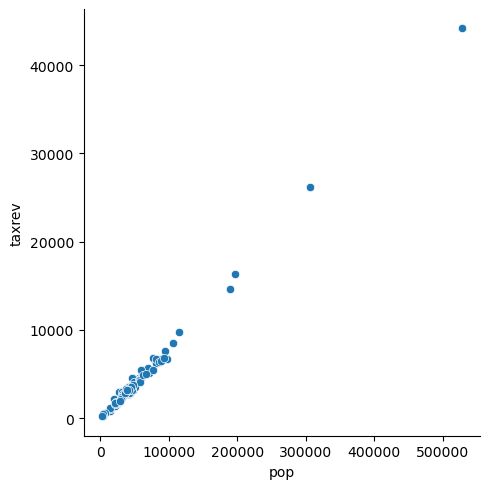

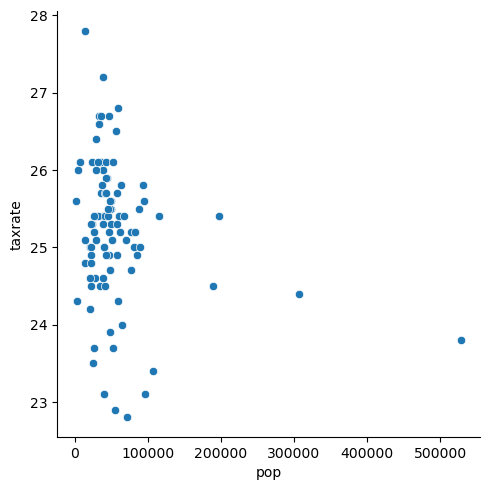

In [3]:
import seaborn as sns
sns.relplot(x='pop', y='taxrev', data=df)
sns.relplot(x='pop', y='taxrate', data=df)

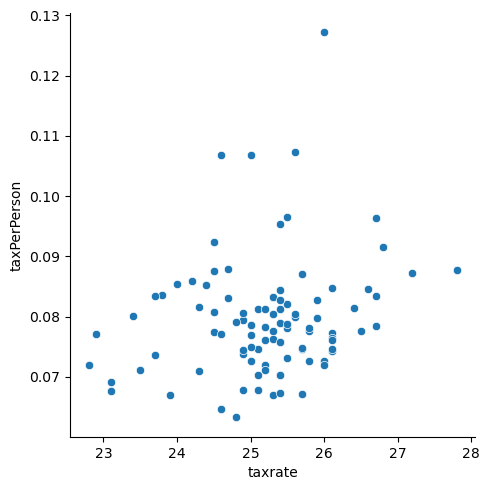

In [4]:
df['taxPerPerson'] = df['taxrev'].values/df['pop'].values
vars = ['kommune','taxPerPerson', 'taxrev', 'pop']
df[vars].sort_values('taxPerPerson', ascending= False)
sns.relplot(x='taxrate', y='taxPerPerson', data=df)

### Problem 2: Empirical analysis of tax revenues and municipal tax rates

In [5]:
#2.3
import statsmodels.api as sm
import numpy as np

y = np.log(df['taxrev'])
model_tc = sm.OLS(y, df[['taxrate','const']]).fit()
print(model_tc.summary())

                            OLS Regression Results                            
Dep. Variable:                 taxrev   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.818
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0965
Time:                        11:46:54   Log-Likelihood:                -111.12
No. Observations:                  98   AIC:                             226.2
Df Residuals:                      96   BIC:                             231.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
taxrate       -0.1426      0.085     -1.679      0.0

In [6]:
#2.5
df['logpop'] = np.log(df['pop'])
model_tcl = sm.OLS(y, df[['taxrate','const','logpop']]).fit()
print(model_tcl.summary())

                            OLS Regression Results                            
Dep. Variable:                 taxrev   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2344.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           1.42e-81
Time:                        11:46:54   Log-Likelihood:                 79.497
No. Observations:                  98   AIC:                            -153.0
Df Residuals:                      95   BIC:                            -145.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
taxrate        0.0226      0.012      1.816      0.0

### Problem 3: Multiple linear regression as two simple linear regressions

In [7]:
#3.3
model_tp = sm.OLS(df['taxrate'], df[['logpop','const']]).fit()
df['res1'] = model_tp.resid
print(model_tp.summary())

                            OLS Regression Results                            
Dep. Variable:                taxrate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.862
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0523
Time:                        11:46:54   Log-Likelihood:                -127.16
No. Observations:                  98   AIC:                             258.3
Df Residuals:                      96   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logpop        -0.2273      0.116     -1.965      0.0

In [8]:
df['logrev'] = y
model_tr = sm.OLS(df['logrev'], df[['res1','const']]).fit()
print(model_tr.summary())

                            OLS Regression Results                            
Dep. Variable:                 logrev   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.06626
Date:                Wed, 18 Sep 2024   Prob (F-statistic):              0.797
Time:                        11:46:54   Log-Likelihood:                -112.50
No. Observations:                  98   AIC:                             229.0
Df Residuals:                      96   BIC:                             234.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
res1           0.0226      0.088      0.257      0.7

## Problem 5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
#import mymlr as mlr

def simulate():

	## Step 1. Definer parameterværdier
	n = 1000
	rho = 0.5
	beta0 = 2
	beta1 = 3
	beta2 =-1

	# Step 2. Simular data
	x1 = np.random.normal(loc=25, scale=5, size=n) # Trækker x1 fra normalfordeling
	u  = np.random.uniform(low=-50, high=50, size=n) # Trækker u fra uniformfordeling
	x2_star = np.random.uniform(low=10, high=30, size=n) # Trækker x2* fra uniformfordeling
	x2 = rho*x1 + x2_star
	y = beta0 + beta1*x1 + beta2*x2 + u

	## Step 3: Estimer SLR modellen (y ~ x1)
	X = pd.DataFrame({'x1': x1}) 
	X = sm.add_constant(X)
	SLR_model = sm.OLS(y, X)
	SLR_results = SLR_model.fit()
	beta1_SLR = SLR_results.params['x1'] # Gemmer beta1 fra SLR-estimatet

	# Step 4: Estimer MLR modellen (y ~ x1 + x2)
	X = pd.DataFrame({'x1': x1, 'x2': x2})
	X = sm.add_constant(X)
	MLR_model = sm.OLS(y, X)
	MLR_results = MLR_model.fit()
	beta1_MLR = MLR_results.params['x1'] # Gemmer beta1 fra MLR-estimatet

	return beta1_SLR, beta1_MLR


def monte_carlo(reps=1000):
	np.random.seed(0) # Sæt seed så vi får samme tilfældige resultater hver gang
	SLR_results = [] # Liste til at gemme beta1 resultater fra SLR
	MLR_results = [] # Liste til at gemme beta1 resultater fra MLR

	for rep in range(reps): # Kør simulationen "reps" antal gange
		beta1_MLR, beta1_SLR = simulate()
		SLR_results.append(beta1_MLR)
		MLR_results.append(beta1_SLR)

	results = pd.DataFrame({'beta1_SLR': SLR_results, 'beta1_MLR': MLR_results})

	return results


In [4]:
results = monte_carlo()

NameError: name 'sm' is not defined